In [1]:
import pandas as pd
import csv
import io
pd.options.mode.chained_assignment = None
with open('student.csv','rb') as file:
    content = file.read().decode('utf-8', errors='ignore')
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

data1 = pd.read_csv('student.csv')


#篩選出師大學士女生
condition1 = data1['學校名稱'] == '國立臺灣師範大學'
condition2 = data1['等級別'] == 'B 學士'

filtered_data = data1[condition1 & condition2][['男生計', '女生計']]
filtered_data['Year'] = '111'
filtered_data['學校名稱'] = '師大'
filtered_data

,男生計,女生計,Year,學校名稱
15,"3,810","4,584",111,師大


### 1. 師大今年入學人數男女數

Text(0.5, 1.0, 'NTNU111')

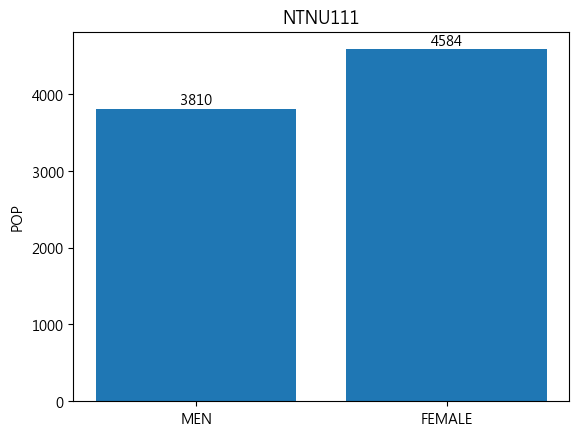

In [2]:
categories = ['MEN', 'FEMALE']
values = [3810, 4584]

# 創建一個長條圖
plt.bar(categories, values)
plt.rcParams['axes.unicode_minus'] = False
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# 設定標籤
plt.ylabel('POP')
plt.title('NTNU111')


### 2. 男女生比例

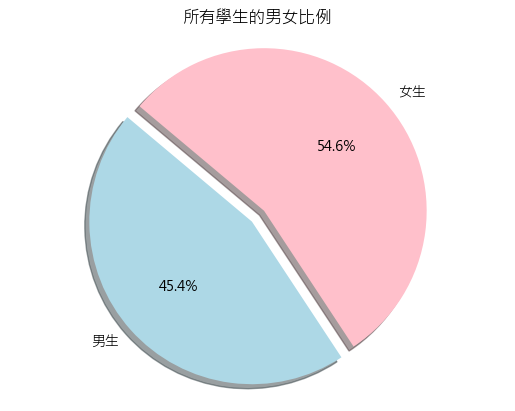

In [34]:
labels = ['男生', '女生']
sizes = [3810, 4584]
colors = ['lightblue', 'pink']
explode = (0, 0.1)  #

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖為等比例
plt.title('所有學生的男女比例')
plt.show()

### 3. 台清交成政師大111年度入學人數比較

In [34]:
condition1 = data1['學校名稱'] .isin (['國立臺灣大學','國立清華大學','國立陽明交通大學','國立成功大學','國立政治大學','國立臺灣師範大學'])
condition2 = data1['等級別'] == 'B 學士'
filtered_data1 = data1[condition1 & condition2][['學校名稱','總計']]
filtered_data1



,學校名稱,總計
2,國立政治大學,"9,732"
6,國立清華大學,"9,118"
11,國立臺灣大學,"17,074"
15,國立臺灣師範大學,"8,394"
19,國立成功大學,"12,010"
28,國立陽明交通大學,"8,605"


Text(0, 0.5, 'POP')

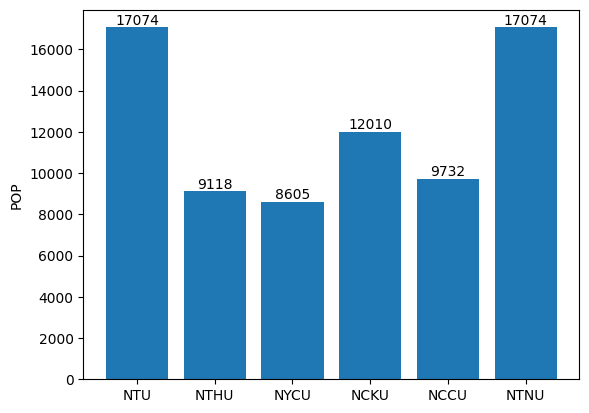

In [39]:
categories = ['NTU', 'NTHU', 'NYCU', 'NCKU', 'NCCU','NTNU']
values = [17074,9118,8605,12010,9732,17074]

# 創建一個長條圖
plt.bar(categories, values)
plt.rcParams['axes.unicode_minus'] = False
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# 設定標籤
plt.ylabel('POP')

### 4. 師大中  學士碩士博士人數比

In [55]:
condition1 = data1['學校名稱'] == ('國立臺灣師範大學')
condition2 = data1['等級別'] .isin(['B 學士','M 碩士','D 博士'])
condition3 = data1['日間∕進修別'] == ('D 日')
filtered_data1 = data1[condition1 & condition2 & condition3][['學校名稱','等級別','總計']]
filtered_data1


,學校名稱,等級別,總計
13,國立臺灣師範大學,D 博士,"1,326"
14,國立臺灣師範大學,M 碩士,"4,360"
15,國立臺灣師範大學,B 學士,"8,394"


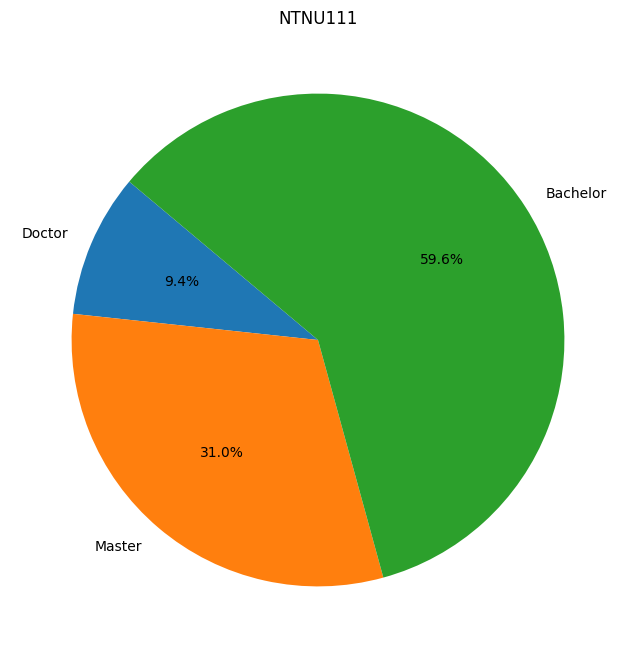

In [63]:
import matplotlib.pyplot as plt

# 数值
level_counts = [1326, 4360, 8394]
# 类别
labels = ['Doctor', 'Master', 'Bachelor']

# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.rcParams['axes.unicode_minus'] = False
plt.title('NTNU111')
# 显示饼图
plt.show()


### 5. 111年度學碩博人數

學士人數: 460801
碩士人數: 174926
博士人數: 28672


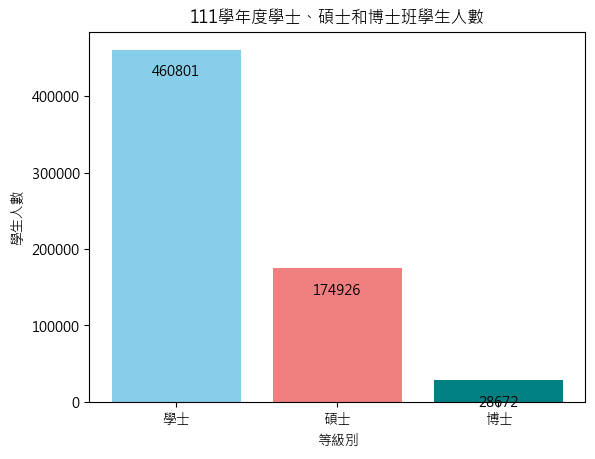

In [28]:
#計算出111學年度分別就讀學士班、碩士班及博士班的總人數

# 使用條件篩選就讀學士班、碩士班及博士班的學生及計算學生的數量
students1 = data1[data1['等級別'] == 'B 學士']
students1['總計'] = students1['總計'].str.replace(',', '').astype(int)  # 刪除逗號並轉換為整數
students1_count = students1['總計'].sum()
students2 = data1[data1['等級別'] == 'M 碩士']
students2['總計'] = students2['總計'].str.replace(',', '').astype(int)  # 刪除逗號並轉換為整數
students2_count = students2['總計'].sum()
students3 = data1[data1['等級別'] == 'D 博士']
students3['總計'] = students3['總計'].str.replace(',', '').astype(int)  # 刪除逗號並轉換為整數
students3_count = students3['總計'].sum()
print("學士人數:",students1_count)
print("碩士人數:",students2_count)
print("博士人數:",students3_count)

categories = ['學士', '碩士', '博士']
student_counts = [students1_count, students2_count,students3_count ]
colors = ['skyblue', 'lightcoral', 'teal']
#畫圖
plt.bar(categories, student_counts, color=colors)
plt.xlabel('等級別')
plt.ylabel('學生人數')
plt.title('111學年度學士、碩士和博士班學生人數')

# 标示每個條形的數量
for i in range(len(student_counts)):
    plt.text(categories[i], student_counts[i]-40000, str(student_counts[i]), ha='center', va='bottom')

plt.show()



In [97]:
condition1 = data1['學校名稱'] == ('國立臺灣師範大學')
condition2 = data1['等級別'] .isin(['B 學士','M 碩士','D 博士'])
condition3 = data1['日間∕進修別'] == ('D 日')
filtered_data1 = data1[condition1 & condition2 & condition3]
# 删除指定的多行和多列
filtered_data1 = filtered_data1.drop(filtered_data1.columns[[0, 2,  4, 5, 6, 23, 24]], axis=1)

filtered_data1

,學校名稱,等級別,一年級男生,一年級女生,二年級男生,二年級女生,三年級男生,三年級女生,四年級男生,四年級女生,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生
13,國立臺灣師範大學,D 博士,111,117,113,107,82,125,90,101,72,83,96,94,68,67,-,-
14,國立臺灣師範大學,M 碩士,675,817,621,820,367,489,240,331,-,-,-,-,-,-,-,-
15,國立臺灣師範大學,B 學士,921,"1,088",931,"1,091",841,"1,079",817,"1,019",-,-,-,-,-,-,300,307


### 6. 台交成政師男女比

台大: 1.4
成大: 1.7
交大: 1.8
政大: 0.8
師大: 0.8


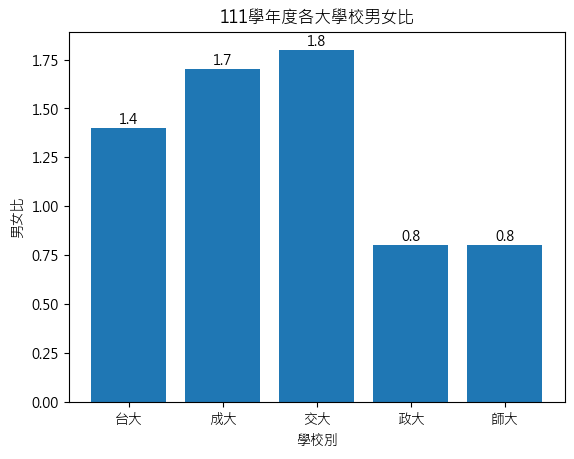

In [89]:
# 使用 .loc 設置值
NTUM = data1[data1['學校名稱'] == '國立臺灣大學']
NTUM['男生計'] = NTUM['男生計'].str.replace(',', '',regex=True).astype(int)
NTUM_count = NTUM['男生計'].sum()

NTUF = data1[data1['學校名稱'] == '國立臺灣大學']
NTUF['女生計'] = NTUF['女生計'].str.replace(',', '',regex=True).astype(int)
NTUF_count = NTUF['女生計'].sum()

NTUscale = NTUM_count / NTUF_count
NTUscale_rounded = round(NTUscale, 1)
print("台大:",NTUscale_rounded)


NCKUM = data1[data1['學校名稱'] == '國立成功大學']
NCKUM['男生計'] = NCKUM['男生計'].str.replace(',', '',regex=True).astype(int)
NCKUM_count = NCKUM['男生計'].sum()
NCKUF = data1[data1['學校名稱'] == '國立成功大學']
NCKUF['女生計'] = NCKUF['女生計'].str.replace(',', '',regex=True).astype(int)
NCKUF_count = NCKUF['女生計'].sum()
NCKUscale = NCKUM_count / NCKUF_count
NCKUscale_rounded = round(NCKUscale, 1)
print("成大:",NCKUscale_rounded)

NYCUM = data1[data1['學校名稱'] == '國立陽明交通大學']
NYCUM['男生計'] = NYCUM['男生計'].str.replace(',', '',regex=True).astype(int)
NYCUM_count = NYCUM['男生計'].sum()
NYCUF = data1[data1['學校名稱'] == '國立陽明交通大學']
NYCUF['女生計'] = NYCUF['女生計'].str.replace(',', '',regex=True).astype(int)
NYCUF_count = NYCUF['女生計'].sum()
NYCUscale = NYCUM_count / NYCUF_count
NYCUscale_rounded = round(NYCUscale, 1)
print("交大:",NYCUscale_rounded)

NCCUM = data1[data1['學校名稱'] == '國立政治大學']
NCCUM['男生計'] = NCCUM['男生計'].str.replace(',', '',regex=True).astype(int)
NCCUM_count = NCCUM['男生計'].sum()
NCCUF = data1[data1['學校名稱'] == '國立政治大學']
NCCUF['女生計'] = NCCUF['女生計'].str.replace(',', '',regex=True).astype(int)
NCCUF_count = NCCUF['女生計'].sum()
NCCUscale = NCCUM_count / NCCUF_count
NCCUscale_rounded = round(NCCUscale, 1)
print("政大:",NCCUscale_rounded)

NTNUM = data1[data1['學校名稱'] == '國立臺灣師範大學']
NTNUM['男生計'] = NTNUM['男生計'].str.replace(',', '',regex=True).astype(int)
NTNUM_count = NTNUM['男生計'].sum()
NTNUF = data1[data1['學校名稱'] == '國立臺灣師範大學']
NTNUF['女生計'] = NTNUF['女生計'].str.replace(',', '',regex=True).astype(int)
NTNUF_count = NTNUF['女生計'].sum()
NTNUscale = NTNUM_count / NTNUF_count
NTNUscale_rounded = round(NTNUscale, 1)
print("師大:",NTNUscale_rounded)



categories = ['台大', '成大', '交大', '政大', '師大']
student_counts = [NTUscale_rounded, NCKUscale_rounded,NYCUscale_rounded,NCCUscale_rounded,NTNUscale_rounded]
plt.bar(categories, student_counts)
plt.xlabel('學校別')
plt.ylabel('男女比')
plt.title('111學年度各大學校男女比')

for i in range(len(categories)):
    plt.text(categories[i], student_counts[i], str(student_counts[i]), ha='center', va='bottom')

### 7. 一般、技職和師範體系學生人數

一般人數: 582227
技職人數: 514900
師範人數: 42962


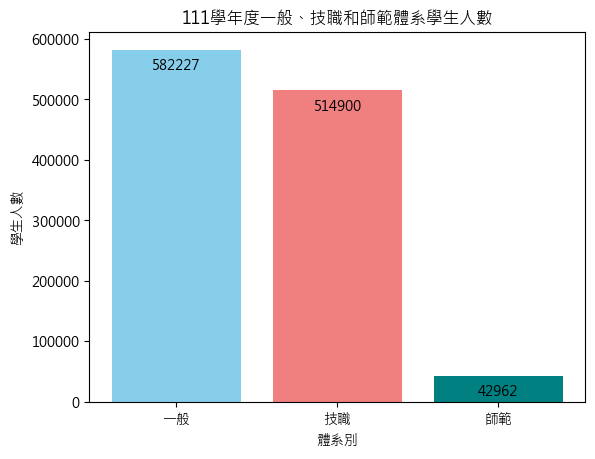

In [33]:
students1 = data1[data1['體系別'] == '1 一般']
students1['總計'] = students1['總計'].str.replace(',', '',regex=True).astype(int)  # 刪除逗號並轉換為整數
students1_count = students1['總計'].sum()

students2 = data1[data1['體系別'] == '2 技職']
students2['總計'] = students2['總計'].str.replace(',', '',regex=True).astype(int)  # 刪除逗號並轉換為整數
students2_count = students2['總計'].sum()

students3 = data1[data1['體系別'] == '3 師範']
students3['總計'] = students3['總計'].str.replace(',', '',regex=True).astype(int)  # 刪除逗號並轉換為整數
students3_count = students3['總計'].sum()

print("一般人數:",students1_count)
print("技職人數:",students2_count)
print("師範人數:",students3_count)

categories = ['一般', '技職', '師範']
student_counts = [students1_count, students2_count,students3_count ]
colors = ['skyblue', 'lightcoral', 'teal']
#畫圖
plt.bar(categories, student_counts, color=colors)
plt.xlabel('體系別')
plt.ylabel('學生人數')
plt.title('111學年度一般、技職和師範體系學生人數')

# 标示每個條形的數量
for i in range(len(student_counts)):
    plt.text(categories[i], student_counts[i]-40000, str(student_counts[i]), ha='center', va='bottom')

plt.show()

### 8. 台師大佔所有學生多少%

總人數: 1140089
台師大人數: 16262
所占比例: 1.4 %


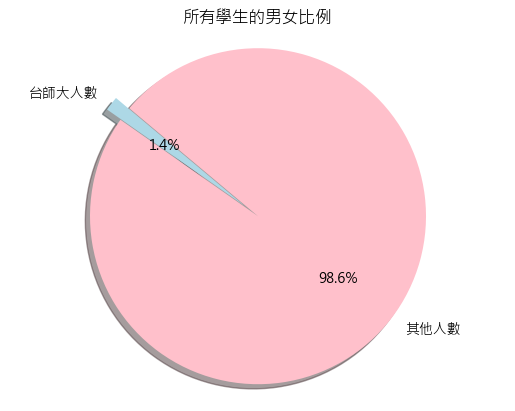

In [4]:
NTNU = data1[data1['學校名稱'] == '國立臺灣師範大學']
NTNU['總計'] = NTNU['總計'].str.replace(',', '',regex=True).astype(int)
NTNU_count = NTNU['總計'].sum()

#ALL = data1[data1['學校名稱'] == '國立臺灣師範大學']
#ALL['總計'] = ALL['總計'].str.replace(',', '',regex=True).astype(int)
#ALL_count = ALL['總計'].sum()

column_name = '總計'  # 請替換為你要搜尋的列名
selected_column = data1[column_name].str.replace(',', '', regex=True).astype(int)
column_sum = selected_column.sum()

perscnt = (NTNU_count/column_sum)*100
perscntrounded = round(perscnt, 1)
print("總人數:",column_sum)
print("台師大人數:",NTNU_count)
print("所占比例:",perscntrounded,"%")

labels = ['台師大人數', '其他人數']
sizes = [perscntrounded, 100]
colors = ['lightblue', 'pink']
explode = (0, 0.1)  #

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖為等比例
plt.title('所有學生的男女比例')
plt.show()

### 9. 國立私立學校人數占比

私立: 691469
國立: 448620
總共: 1140089


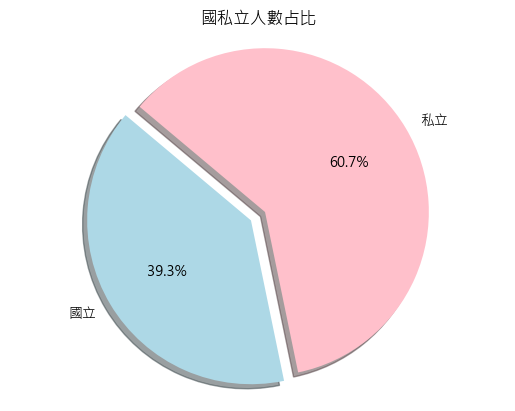

In [10]:
national_universities = data1[data1['學校名稱'].str.contains('國立')]
national_universities['總計'] = national_universities['總計'].str.replace(',', '',regex=True).astype(int)
national_universities_count = national_universities['總計'].sum()

column_name = '總計'  # 請替換為你要搜尋的列名
selected_column = data1[column_name].str.replace(',', '', regex=True).astype(int)
column_sum = selected_column.sum()
private_universities = column_sum-national_universities_count
print("私立:",private_universities)
print("國立:",national_universities_count)
print("總共:",column_sum)

labels = ['國立', '私立']
sizes = [national_universities_count, private_universities]
colors = ['lightblue', 'pink']
explode = (0, 0.1)  #

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖為等比例
plt.title('國私立人數占比')
plt.show()

### 10. 師大人數占師範體系裡多少

師範: 42962
師大: 16262


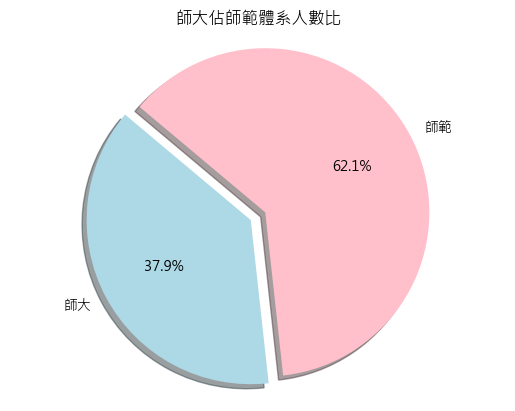

In [19]:
students3 = data1[data1['體系別'] == '3 師範']
students3['總計'] = students3['總計'].str.replace(',', '',regex=True).astype(int)  # 刪除逗號並轉換為整數
students3_count = students3['總計'].sum()

NTNU = data1[data1['學校名稱'] == '國立臺灣師範大學']
NTNU['總計'] = NTNU['總計'].str.replace(',', '',regex=True).astype(int)
NTNU_count = NTNU['總計'].sum()
print("師範:",students3_count)
print("師大:",NTNU_count)

students3_count1 =students3_count-NTNU_count

labels = ['師大', '其他師範']
sizes = [NTNU_count, students3_count1]
colors = ['lightblue', 'pink']
explode = (0, 0.1)  #

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖為等比例
plt.title('師大佔師範體系人數比')
plt.show()